In [1]:
%matplotlib inline

In [2]:
import pylab as pl
from astropy.io import fits
from astropy.visualization import simple_norm

In [3]:
pl.rcParams['figure.figsize'] = (15,15)
pl.rcParams['image.origin'] = 'lower'
pl.style.use('dark_background')

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


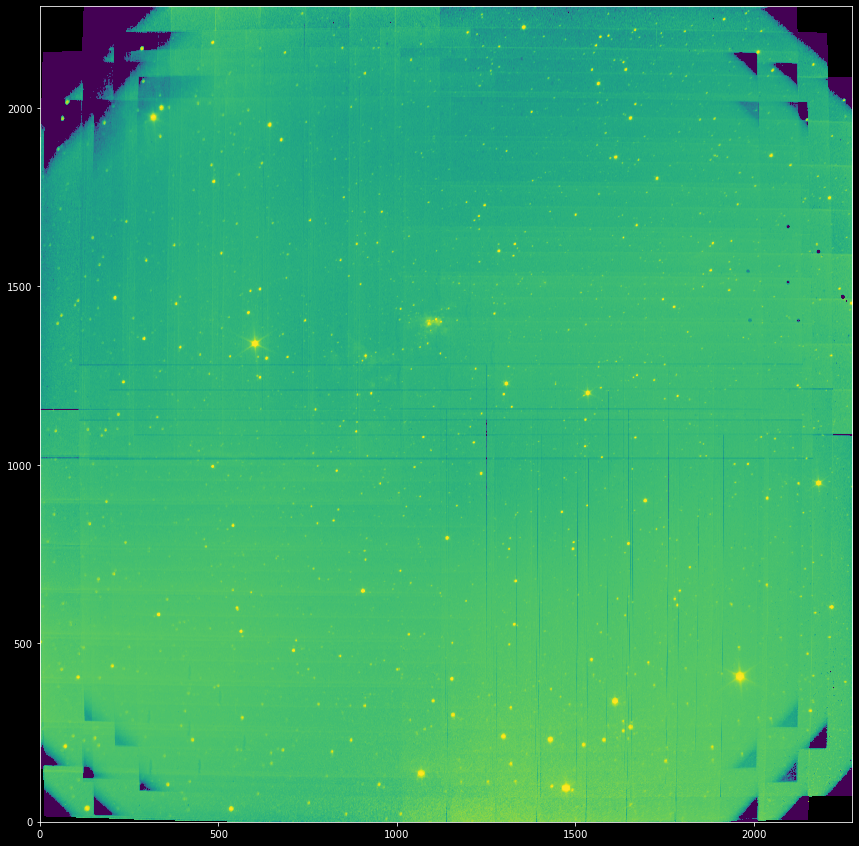

In [4]:
fh = fits.open('FinalMosaics/H_FINAL_MOSAIC.fits')
pl.imshow(fh[0].data, norm=simple_norm(fh[0].data, stretch='log', min_percent=2, max_percent=99.995))

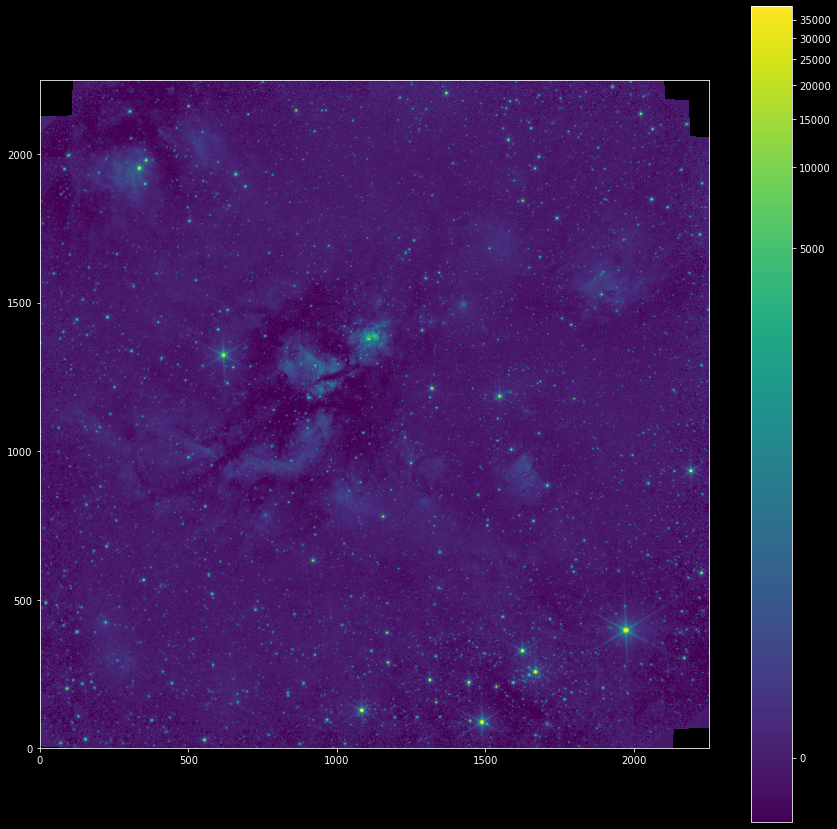

In [5]:
fh = fits.open('FinalMosaics/H2_FINAL_MOSAIC.fits')
pl.imshow(fh[0].data, norm=simple_norm(fh[0].data, stretch='log', min_percent=2, max_percent=99.995))
pl.colorbar()

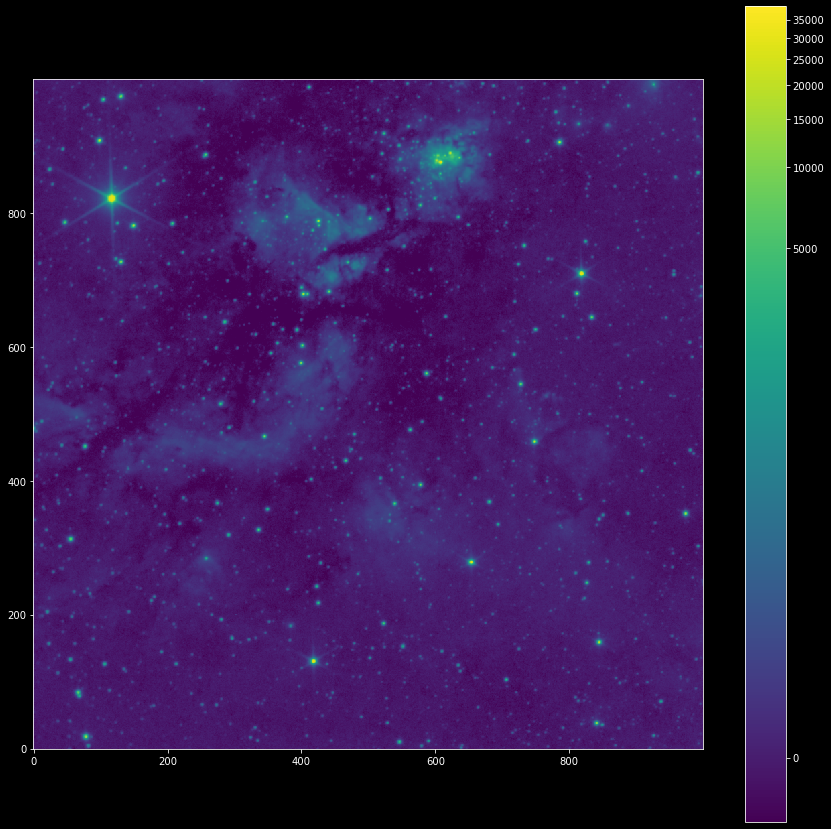

In [6]:
fh = fits.open('FinalMosaics/H2_FINAL_MOSAIC.fits')
pl.imshow(fh[0].data[500:1500,500:1500], norm=simple_norm(fh[0].data, stretch='log', min_percent=2, max_percent=99.995))
pl.colorbar()

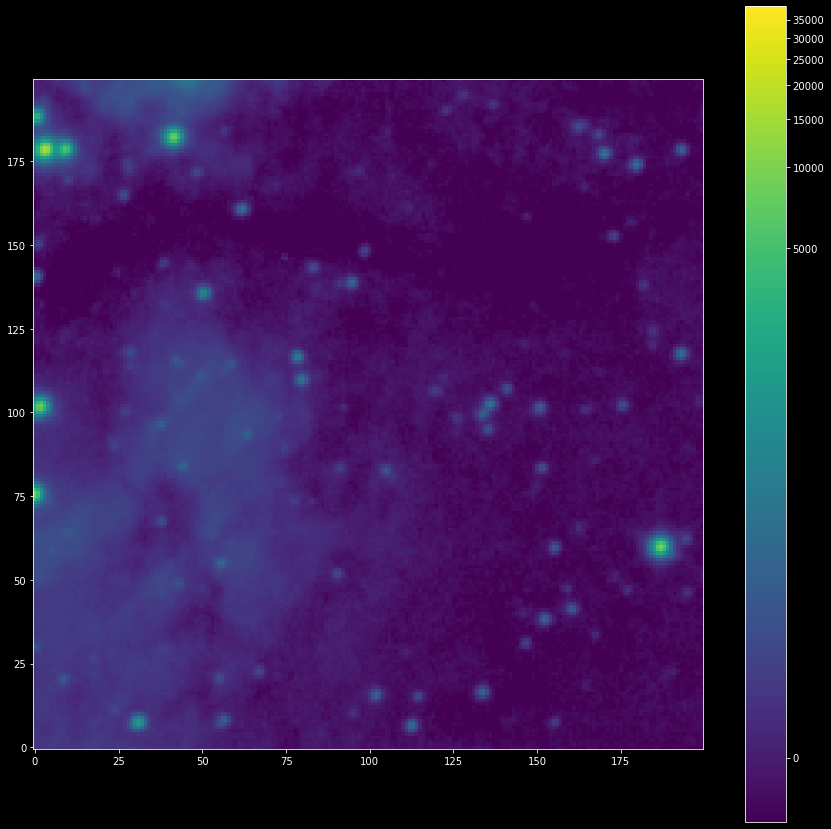

In [7]:
fh = fits.open('FinalMosaics/H2_FINAL_MOSAIC.fits')
pl.imshow(fh[0].data[1000:1200,900:1100], norm=simple_norm(fh[0].data, stretch='log', min_percent=2, max_percent=99.995))
pl.colorbar()

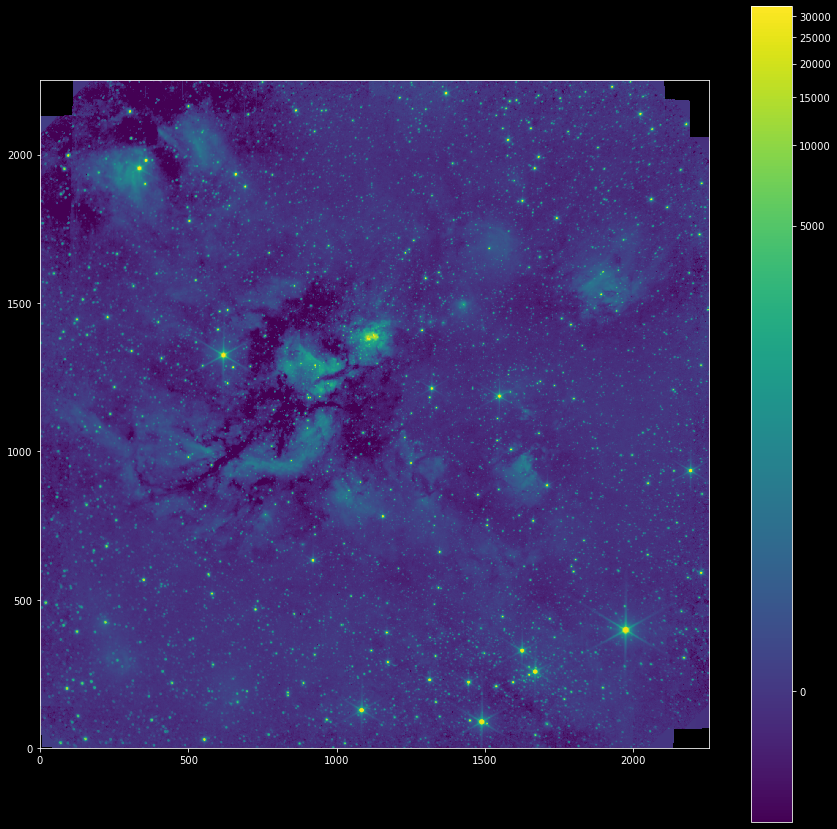

In [8]:
fh = fits.open('FinalMosaics/K_FINAL_MOSAIC.fits')
pl.imshow(fh[0].data, norm=simple_norm(fh[0].data, stretch='log', min_percent=2, max_percent=99.995))
pl.colorbar()

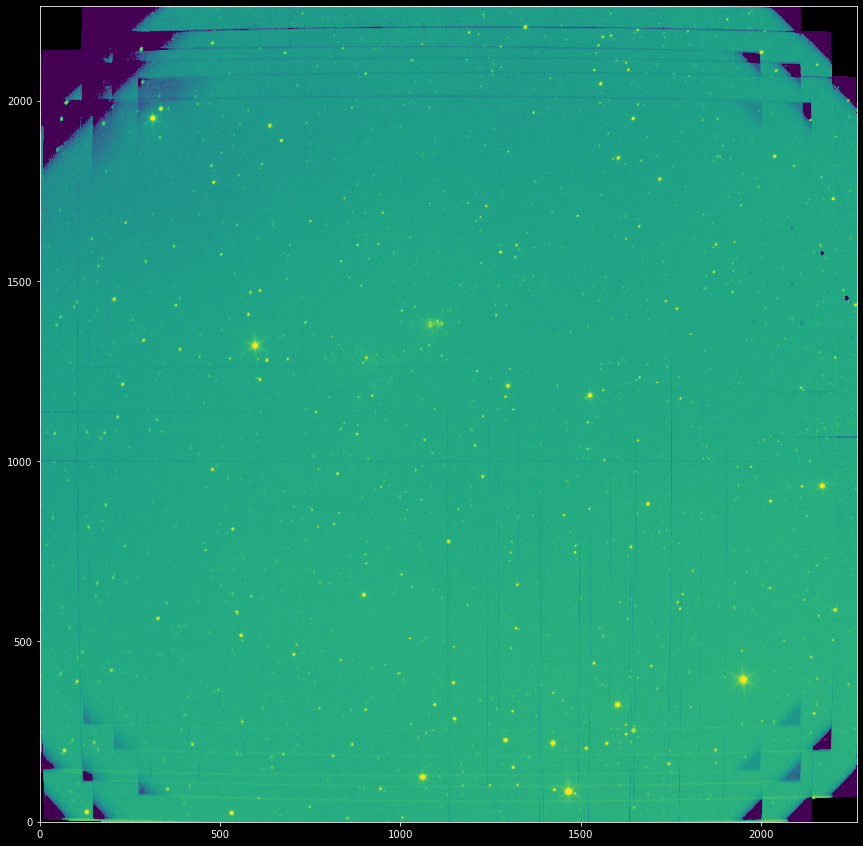

In [9]:
fh = fits.open('FinalMosaics/J_FINAL_MOSAIC.fits')
pl.imshow(fh[0].data, norm=simple_norm(fh[0].data, stretch='log', min_percent=2, max_percent=99.995))

In [10]:
h2fh = fits.open('FinalMosaics/H2_FINAL_MOSAIC.fits')
kfh = fits.open('FinalMosaics/K_FINAL_MOSAIC.fits')

In [11]:
from astropy import wcs

In [12]:
def strip_sip_and_cdelt(header):
    return fits.Header({key:value for key, value in header.items() if not(key.startswith("A_") or key.startswith("AP_") or key.startswith("B_") or key.startswith("BP_") or key.startswith("CDELT"))})

In [13]:
import reproject

In [14]:
h2fh[0].data.shape

(2251, 2254)

In [15]:
kfh[0].data.shape

(2253, 2256)

In [16]:
wcs.WCS(strip_sip_and_cdelt(h2fh[0].header)).to_header()

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =       1116.892106604 / Pixel coordinate of reference point            
CRPIX2  =      1102.3299680635 / Pixel coordinate of reference point            
PC1_1   = -5.3973617156673E-05 / Coordinate transformation matrix element       
PC1_2   = -2.9269032919956E-08 / Coordinate transformation matrix element       
PC2_1   =  3.4757158277728E-08 / Coordinate transformation matrix element       
PC2_2   =  -5.400940138319E-05 / Coordinate transformation matrix element       
CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  
CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [17]:
wh2 = wcs.WCS(strip_sip_and_cdelt(h2fh[0].header))

In [18]:
wk = wcs.WCS(strip_sip_and_cdelt(kfh[0].header))

In [19]:
wh2.wcs_pix2world(100,100,0)

[array(290.97340461), array(14.5575823)]

In [20]:
wk.wcs_pix2world(100,100,0)

[array(290.97332165), array(14.55785655)]

In [21]:
wh2.wcs_world2pix(*wk.wcs_pix2world(100,100,0), 0)

[array(101.49157274), array(94.92345123)]

In [22]:
wh2.wcs_world2pix(290.91672122, 14.50354613, 0)

[array(1115.94691178), array(1101.27595624)]

In [23]:
wh2.wcs_world2pix(290.91682478, 14.50365333, 0)

[array(1114.09041979), array(1099.2899215)]

In [24]:
(14.50354613-14.50365333) * 3600

-0.38592000000150506

In [25]:
wh2.pixel_scale_matrix

array([[-5.39736172e-05, -2.92690329e-08],
       [ 3.47571583e-08, -5.40094014e-05]])

In [26]:
k_rep_h2, cov = reproject.reproject_interp((np.nan_to_num(kfh[0].data), wcs.WCS(strip_sip_and_cdelt(kfh[0].header))), wcs.WCS(strip_sip_and_cdelt(h2fh[0].header)), shape_out=h2fh[0].data.shape)

In [27]:
np.any(np.isfinite(k_rep_h2))

True

In [28]:
cov.sum()

5064300.0

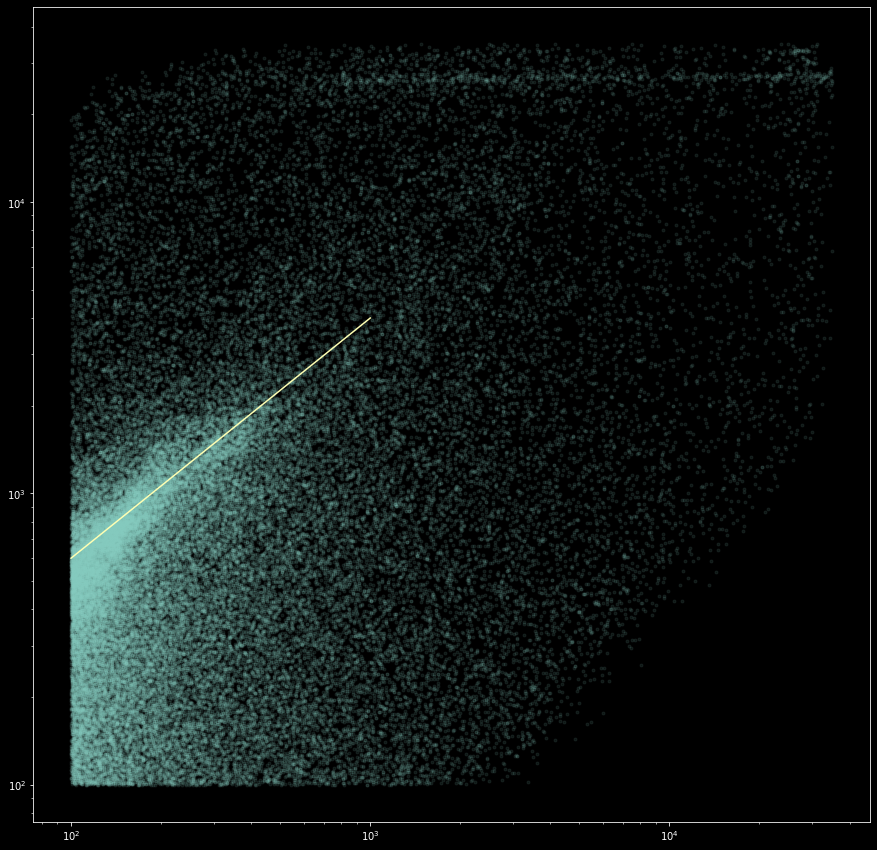

In [29]:
mask = (h2fh[0].data>100) & (h2fh[0].data<35000) & (k_rep_h2>100) & (k_rep_h2<35000)
pl.loglog(h2fh[0].data[mask], k_rep_h2[mask], '.', alpha=0.1)
pl.plot([100,1000],[600,4000])

In [30]:
m = ((4000-600)/(1000-100))
b = 600 - (100*m)

In [31]:
kscaled = (k_rep_h2-b)/m

In [32]:
h2mk = h2fh[0].data-kscaled

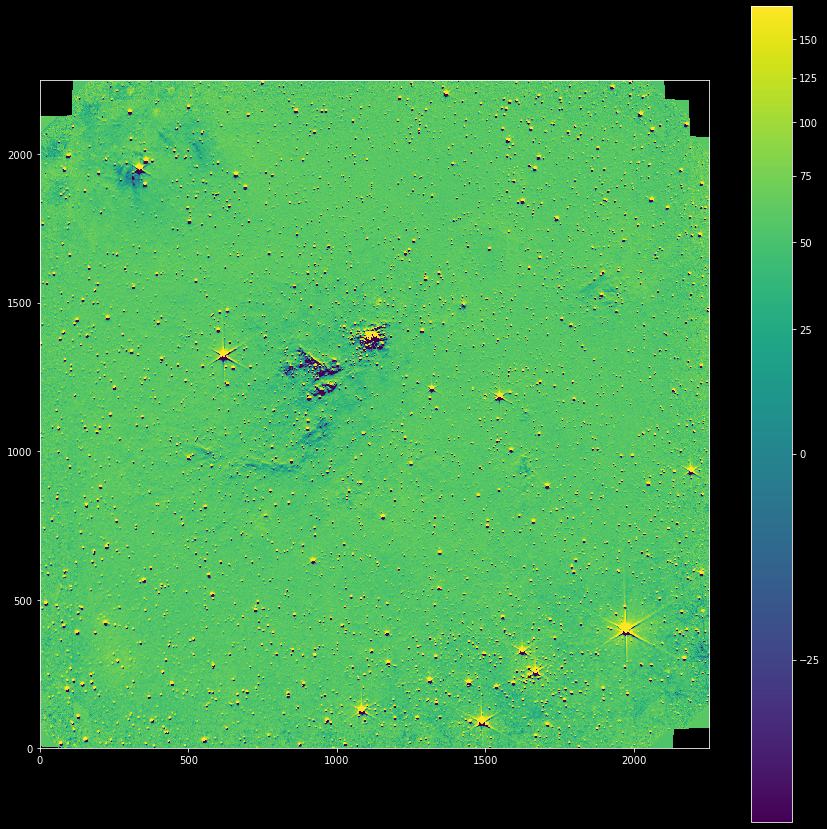

In [33]:
pl.imshow(h2mk, norm=simple_norm(h2mk, min_percent=1, max_percent=99., stretch='asinh'))
pl.colorbar()

In [34]:
ls

BadDitherExample.ipynb     kBand/                    wcsCorrectedImages/
ExtraFiltersTest.ipynb     LookAtFinalMosaics.ipynb  wcsCorrectedImages1/
FinalMosaics/              Photometry.ipynb          wcsCorrectedImagesTest/
h2Band/                    __pycache__/              WCSCorrection.ipynb
hBand/                     ReprojectedImages/        wcsFunction-Copy1.py2
imagereview.py             ReprojectedImages1/       WCSFunction.ipynb
imagereview.py~            ReprojectedImages2/       wcsFunction.py
ipython_log_2020-12-14.py  Reproject.ipynb           WCSTest1.ipynb
ipython_log_2020-12-18.py  Test1ExamineFiles.ipynb   WCSTest2.ipynb
ipython_log_2021-01-18.py  Test2ExamineFiles.ipynb   wcsTestImages/
ipython_log_2021-01-26.py  Test3ExamineFiles.ipynb   xterm_58833534.log
ipython_log_2021-02-08.py  Untitled1.ipynb           xterm_g2atnzk4.sbatch
ipython_log_2021-02-16.py  Untitled.ipynb


In [35]:
ls /orange/adamginsburg/w51/gtc/parker/FinalMosaics

H2_FINAL_MOSAIC.fits           J_FINAL_MOSAIC.fits
H2_PHOTOMETRY_RESULTS.dat      K_FINAL_MOSAIC.fits
H2_POST_PHOT_RESID_IMAGE.fits  K_PHOTOMETRY_RESULTS.dat
H_FINAL_MOSAIC.fits            K_POST_PHOT_RESID_IMAGE.fits


/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


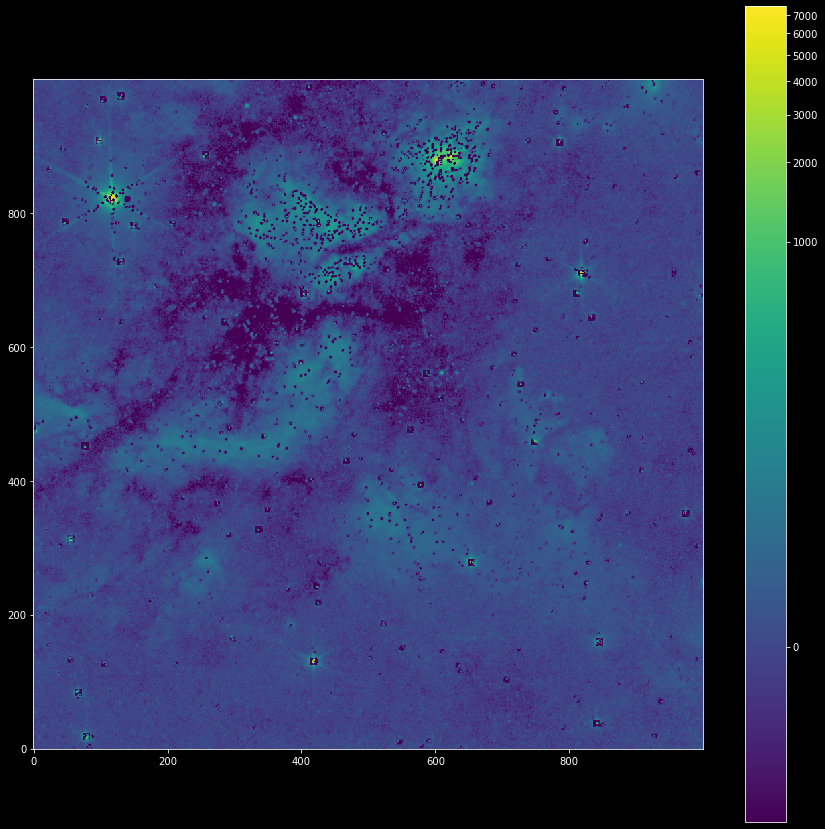

In [36]:
fh = fits.open('FinalMosaics/H2_POST_PHOT_RESID_IMAGE.fits')
pl.imshow(fh[0].data[500:1500,500:1500], norm=simple_norm(fh[0].data, stretch='log', min_percent=2, max_percent=99.995))
pl.colorbar()

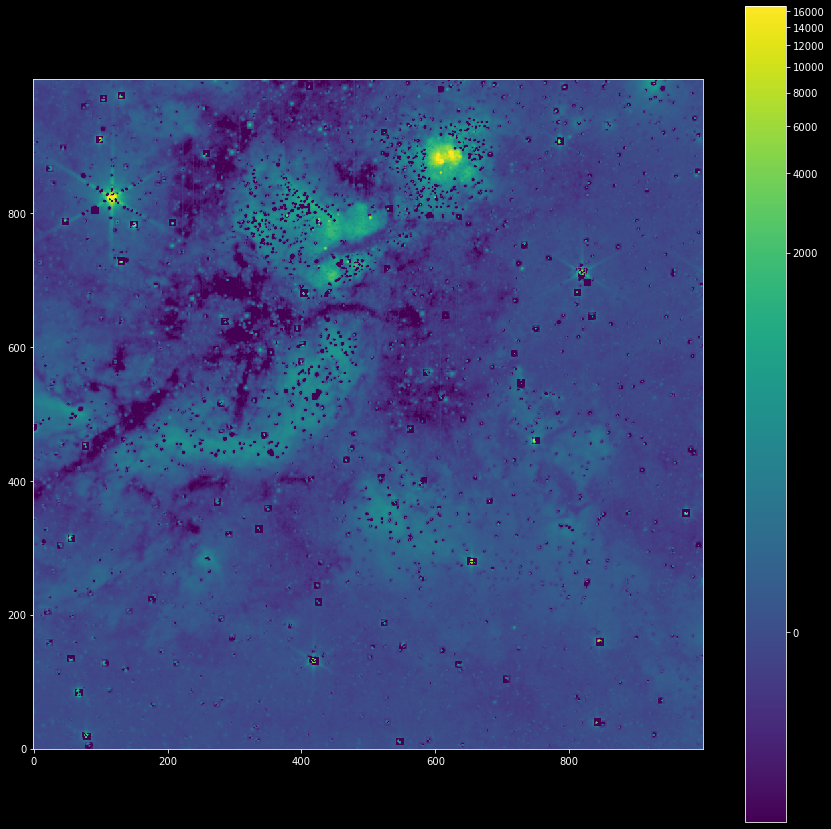

In [37]:
fh = fits.open('FinalMosaics/K_POST_PHOT_RESID_IMAGE.fits')
pl.imshow(fh[0].data[500:1500,500:1500], norm=simple_norm(fh[0].data, stretch='log', min_percent=2, max_percent=99.995))
pl.colorbar()